#### Importing the relevant libraries

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.describe(include='all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [4]:
# Checking the null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
# Dropping irrelevant columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [7]:
# Renaming the column headers
df.rename(columns = {'v1':'Category', 'v2':'Text'}, inplace = True) 
df

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### Visualizing the data

Label distribution (%):
 ham     86.59
spam    13.41
Name: Category, dtype: float64


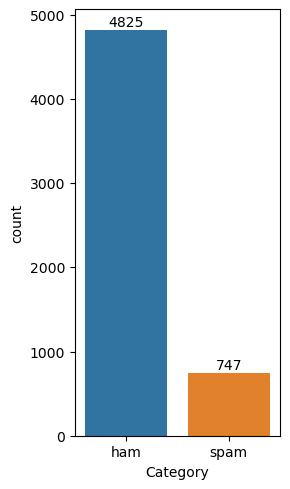

In [8]:
# Visualizing ham and spam emails
print('Label distribution (%):\n', round(df.Category.value_counts(normalize=True),4)*100)
# normalize = True; returns the proportions rather than frequency, is set to False; returns 8659 and 1341
plt.figure(figsize=(3,5))
# figsize; sets the Width and the height in inches
ax=sns.countplot(data=df, x='Category')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()

In [9]:
# Adding the length column with length of text column
df['Length'] = df['Text'].apply(len)
df

,Category,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [10]:
df['Length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: Length, dtype: float64

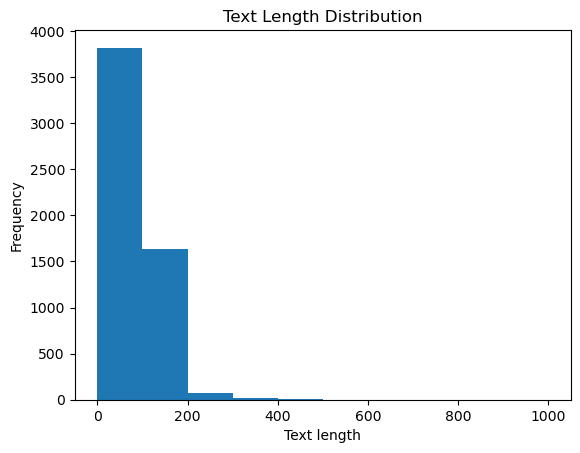

In [11]:
# Visualizing the frequency of length of texts

## Initializing the bins
bins = np.arange(0,1001,100)

# Creating histogram
plt.hist(df['Length'], bins=bins)
plt.xlabel('Text length')
plt.ylabel('Frequency')
plt.title('Text Length Distribution')
plt.show()

#### Encoding the Category column with 1 or 0

In [12]:
df['Category'] = df['Category'].map({'ham':0,'spam':1})
df

,Category,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


#### Converting a collection of text documents to a matrix of token counts and separating inputs and targets

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count=CountVectorizer()
text = count.fit_transform(df['Text'])

inputs = text
targets = df['Category']

#### Splitting the data into train test

In [14]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)

In [15]:
#### Checking the shape
inputs_train.shape, targets_train.shape, inputs_test.shape, targets_test.shape

((4457, 8672), (4457,), (1115, 8672), (1115,))

#### Building the Multi-layer Perceptron (MLP) model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
# Implementing model with better parameter
params = {
    'hidden_layer_sizes': [(10,10,10), (50,50,50)],
    'max_iter': [300, 400, 500]
}
mlp_clf = MLPClassifier(
    activation= 'relu',
    solver= 'adam',
    learning_rate= 'adaptive',
    early_stopping= True)
mlp_clf_gsv = GridSearchCV(estimator=mlp_clf, param_grid=params)
mlp_clf_gsv.fit(inputs_train, targets_train)

mlp_clf_model = mlp_clf_gsv.best_estimator_
mlp_clf_model.fit(inputs_train, targets_train)

#### Calculating the accuracy score of the model

In [ ]:
from sklearn.metrics import accuracy_score
mlp_clf_score = (accuracy_score(targets_test, mlp_clf_model.predict(inputs_test)) * 100).round(2)
print("Accuracy score of the MLP Classifier model is:\t", (mlp_clf_score))

#### Building Multinomial Naive Bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
multinomial_clf = MultinomialNB()
multinomial_clf.fit(inputs_train, targets_train)

In [ ]:
multinomial_clf_score = (accuracy_score(targets_test, multinomial_clf.predict(inputs_test)) * 100).round(2)
print("Accuracy score of the MNB Classifier model is:\t", (multinomial_clf_score))

#### Building Bernoulli Naive Bayes model

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_clf = BernoulliNB()
bernoulli_clf.fit(inputs_train, targets_train)

In [ ]:
bernoulli_clf_score = (accuracy_score(targets_test, bernoulli_clf.predict(inputs_test)) * 100).round(2)
print("Accuracy score of the Bernoulli Naive Bayes model is:\t", (bernoulli_clf_score))

#### Creating a pd DataFrame to visualize the differences between the accuracy score of each model

In [ ]:
score_table = pd.DataFrame({
    'Model': ['Multilayer Perceptron model', 'Multinominal Naive Bayes', 'Bernoulli Naive Bayes'],
    'Accuracy Score': [mlp_clf_score, multinomial_clf_score, bernoulli_clf_score]
})
score_table